In [16]:
path= '\\Users\\stell\\OneDrive\\Dokumente\\fp55\\Daten\\'
path2='\\Users\\stell\\OneDrive\\Dokumente\\fp55\\Ergebnisse\\'

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

In [17]:
data=np.genfromtxt(path+'Report_Table_Trennzeichen bearbeiten.csv', delimiter=';', skip_header=7410) #Daten importieren

In [24]:
ID=data[:,0] #ID der Messung
T=data[:,8] #Temperatur in Grad Celicius
H=data[:,9] #Luftfeuchtigkeit in Prozent

#Datum und Zeit
Monat=data[:,1]
Tag=data[:,2] 
Stunde=data[:,4]
Minute=data[:,5]

In [82]:
#Masken für einzelne Messungen

#Messung von 13:45-18:02 am 23.07
maske1=(ID>7415)&(ID<7467)
ID1=ID[maske1]
T1=T[maske1]
H1=H[maske1]
Tag1=Tag[maske1]
Stunde1=Stunde[maske1]
Minute1=Minute[maske1]

Zeit1=Stunde1*60+Minute1-109 #Zeitberechnung inklusive Offset-Korrektur

#Messung von 11:07-14:09 am 24.07
maske2=(ID>7671)&(ID<7708)
ID2=ID[maske2]
T2=T[maske2]
H2=H[maske2]
Tag2=Tag[maske2]
Stunde2=Stunde[maske2]
Minute2=Minute[maske2]

Stunde2[Stunde2 == 1] = 13 #Umrechnung der Zeit von 1pm in 13 Uhr
Stunde2[Stunde2 == 2] = 14


Zeit2=Stunde2*60+Minute2-669 #Zeitberechnung inklusive Offset-Korrektur

#Gesamt Messung von 13:45 am 23.07 bis 13:15 am 25.07
maske3=(ID>7415)&(ID<7985)
ID3=ID[maske3]
T3=T[maske3]
H3=H[maske3]
Tag3=Tag[maske3]
Stunde3=Stunde[maske3]
Minute3=Minute[maske3]

print(Zeit2)

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175.]


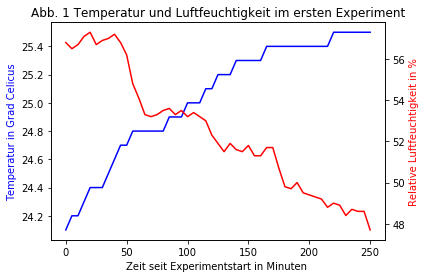

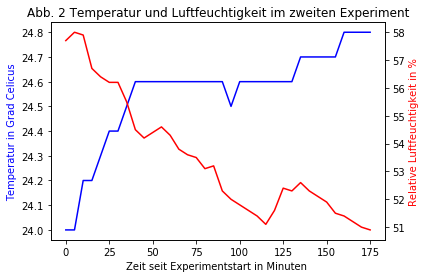

In [91]:
#Plot der Messungen mit zweifacher y-Achse

fig, ax1 = plt.subplots()
ax1.plot(Zeit1, T1, 'b-')
ax1.set_xlabel('Zeit seit Experimentstart in Minuten ')
ax1.set_ylabel('Temperatur in Grad Celicus', color='b')

ax2 = ax1.twinx()
ax2.plot(Zeit1, H1, 'r-')
ax2.set_ylabel('Relative Luftfeuchtigkeit in %', color='r')
plt.title('Abb. 1 Temperatur und Luftfeuchtigkeit im ersten Experiment')
plt.savefig(path2+'Abb1.png')

fig, ax1 = plt.subplots()
ax1.plot(Zeit2, T2, 'b-')
ax1.set_xlabel('Zeit seit Experimentstart in Minuten ')
ax1.set_ylabel('Temperatur in Grad Celicus', color='b')

ax2 = ax1.twinx()
ax2.plot(Zeit2, H2, 'r-')
ax2.set_ylabel('Relative Luftfeuchtigkeit in %', color='r')
plt.title('Abb. 2 Temperatur und Luftfeuchtigkeit im zweiten Experiment')
plt.savefig(path2+'Abb2.png')

In [92]:
T1mean=np.mean(T1)
T1meanerror=np.std(T1)
H1mean=np.mean(H1)
H1meanerror=np.std(H1)

T2mean=np.mean(T2)
T2meanerror=np.std(T2)
H2mean=np.mean(H2)
H2meanerror=np.std(H2)

print('Experiment 1: Durchschnittstemperatur =', T1mean, '+/-', T1meanerror, 'Durchschnittsluftfeuchtigkeit =', H1mean, '+/-', H1meanerror)
print('Experiment 2: Durchschnittstemperatur =', T2mean,'+/-', T2meanerror, 'Durchschnittsluftfeuchtigkeit =', H2mean, '+/-', H2meanerror)

Experiment 1: Durchschnittstemperatur = 25.04313725490196 +/- 0.40885056571155726 Durchschnittsluftfeuchtigkeit = 52.45882352941176 +/- 2.8678868678009586
Experiment 2: Durchschnittstemperatur = 24.55555555555555 +/- 0.19499920860871414 Durchschnittsluftfeuchtigkeit = 53.47777777777779 +/- 2.1019978738639096
